Azis Muslim
- FTDS 013 PHASE 2
- DATASET : CUSTOMER TELCO CHURN
- Milestone 1

### Deep Learning Apps Link

##### Deployment without handling imbalance dataset

https://tfserving-ml1-fe.herokuapp.com/

##### Deployment model by handling imbalanced dataset

https://tfserving-att-ml1.herokuapp.com/


## Deep Neural Network Model Analysis To Predict Churn in Telco Company

Pada Peneltian binary classification sebelumnya model machine learning baik supervised maupun unsupervised telah berhasil mengelompokkan data ke dalam kelas yang berbeda. Pada penelitian kali ini proses tersebut akan dilakukan dengan deep learning menggunakan library keras yang terintegrasi dengan tensorflow. Kelebihan dari model deep learning adalah model dapat lebih akurat dalam melakukan prediksi jika dibandingkan dengan model machine learning sebelumnya dan model deep learning lebih mudah dilakukan tuning untuk meminimalisir terjadinya model yang overfit.




Sama halnya seperti model machine learning model deep learning jug mampu melakukan suatu prediksi. Pada Penelitian kali ini Churn akan dijadikan sebagai variabel dependent yang akan diprediksi. Churn sendiri adalah customer yang pergi dalam satu bulan terakhir. Tujuan dari penelitian ini adalah mengenali karakteristik churn customer sehingga program layanan nantinya dapat lebih ditingkatakan. Pada penelitian ini akan digunakan dua model neural network yaitu model functional dan model sequential. 

#### Libary yang digunakan

In [849]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dropout
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import json
import requests
import sklearn
assert sklearn.__version__ >= "0.20"
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#### Pada bagian ini loading dataset akan dilakukan dengan menghubungkan google colab ke kaggle  sehinggap perlu dilakukan drag and drop file kaggle.json ke dalam folder google colab bernama content baru setelah itu file bisa langsung di akses.

In [851]:
# Step 2 : Install Kaggle library in Google Collaboratory.

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle` 
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [852]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [853]:
%%time 
# Step 3 : Download Dataset
# Source dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn
!kaggle datasets download -d blastchar/telco-customer-churn


telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
CPU times: user 13.3 ms, sys: 37.4 ms, total: 50.6 ms
Wall time: 863 ms


In [854]:
!unzip ./telco-customer-churn.zip

Archive:  ./telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [855]:
data_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"

data = pd.read_csv(data_path)

In [856]:
print("The number of examples: {}".format(len(data)))

The number of examples: 7043


Berdasarkan kode di atas dapat terlihat jumlah baris panjang adatanya adalah 7043. Sebagai informasi tambahan panjang data dalam hal ini adalah range data yang ada pada dataset secara keseluruhan. 

In [1014]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Berdasarkan kode di atas dapat dilihat bahwa dataset yang akan di analisa terdiri dari 7043 baris dengan 21 kolom atau fitur

In [857]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan running kode di atas dapat terlihat Total Charges data type nya adalah object dimana ini tidak relevan dengan apa yang ditampilkan pada tabel di atas karena Total Charges jenis datanya seharusnya adalah angka atau int64

In [858]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Setelah dilakukan pengecekan dapat terlihat tidak ada data null pada dataset customer churn dataset

In [1015]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Berdasarkan kode di atas dapat terlihay tidak ada missing value pada dataset

In [859]:
data.dropna(inplace=True)

Kode di atas digunakan untuk melakukan handling pada missing value

In [860]:
df = data.drop(['customerID'], axis=1)

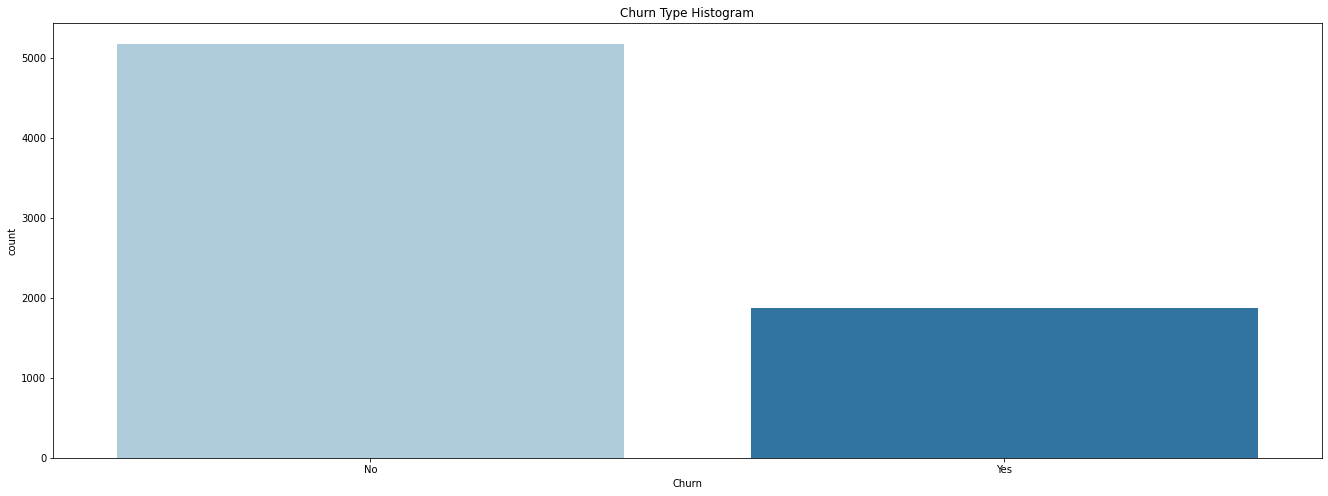

In [861]:
plt.figure(figsize=(50,8))

plt.subplot(1,2,1)
plt.title('Churn Type Histogram')
sns.countplot(df.Churn, palette=("Paired"))

Berdasarkan informasi yang diberikan oleh bar plot di atas terlihat bahwa terdapat imbalance pada variabel dependent sehingga perlu dilakukan handling imbalance untuk fitur tersebut.

In [862]:
diag = px.histogram(df, x="Churn", color="SeniorCitizen")
diag.update_layout(width=750, height=550)
diag.show()

Barplot di atas memberikan informasi bahwa costumer citizen senior paling banyak berada pada Churn No.

In [863]:
diag = px.pie(df, values='TotalCharges', names='Churn', hole=0.3)
diag.show()

Circle Plot diatas memberikan informasi bahwa dari keseluruhan populasi pada total charge hanya terdapat 17.8% Customer yang ada pada kelompok Churn Yes. Sedangkan 82.2% lainnya masuk ke dalam kelompok Custumer Churn No.

In [864]:
labels = df['MultipleLines'].unique()
values = df['MultipleLines'].value_counts()

# pull is given as a fraction of the pie radius
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.2])])
diag.show()

Pie Chart di atas memberikan informasi mengenai layanan yang digunakan costumer baik hanya satu layanan yang biasanya hanya telepon rumah, dua layanan biasanya dengan internet. Berdasarkan pie chart di atas dapat terlihat 48.1 Persen Customer Berada pada kelompok no phone service dan 42.2% Customer berada pada kelompok No Multiple Lines dan sisanya berada pada kelompok Multiple Lines. 

In [865]:
labels = df['InternetService'].unique()
values = df['InternetService'].value_counts()


diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2, 0.3])])
diag.show()

Berdasarkan pie chart di atas di dapat informasi bahwa terdapat 44 % Customer menggunakan layanan DSL (Digital Subscriber Line) 34.4% Menggunakan layanan Fiber Optic dan 21.7% sisanya tidak menggunakan layanan keduanya baik itu DSL maupun Fiber Optic

In [866]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()


diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.3, 0, 0])])
diag.show()

Pada pie chart di atas menjelaskan beragam cara pembayaran customer dengan proporsi yang berbeda beda dari kesluruhan custumer yang ada pada dataset custumer telco churn. Metode pembayaran dengan persentase tertinggi adalah electronic check yang berada di angka 33.6%. Persentase tertinggi kedua berada pada mailed check yang berada pada persentase 22.9%. Persentase tertinggi ketiga berada di angka 21.9% dengan pembayaran bank transfer. Persentase terendah dari keseluruhan custumer churn dataset berada pada pembayaran dengan menggunakan credit card(auto debet) yang persentase nya berada di angka 21.6%.

In [867]:
labels = df['Contract'].unique()
values = df['Contract'].value_counts()


diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2, 0.1])])
diag.show()

Pada pie chart di atas saya akan melihat jenis kontrak pembayaran yang dipilih customer. Berdasarkan pie chart di atas terlihat mayoritas customer melakukan pembayaran dari bulan ke bulan dan untuk kelompok custumer yang melakukan pembayaran dengan cara ini ada 55% dari keseluruhan customer pada dataset. Sedangakan 24.1% customer dan 20.9% customer sisanya memilih term pembayaran one year contract dan two year contract.

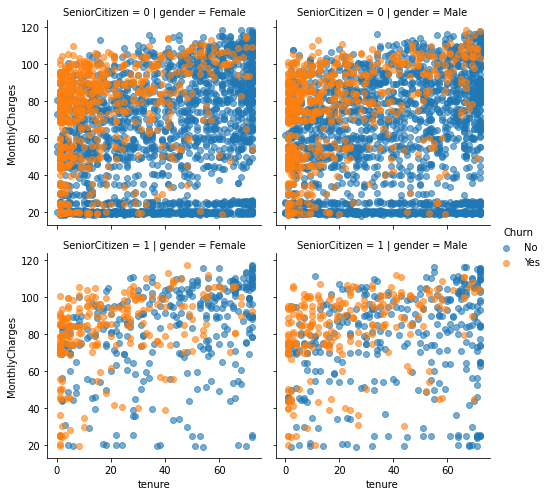

In [868]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

Tenure pada bagian ini menjelaskan berapa lama customer menggunakan jasa layanan komunikasi yang ditawarkan. Berdasrkan scatterplot di atas dapat terlihat karakteristik Churn Yes banyak berkumpul pada tenure yang rendah yaitu di bawah angka 20. Lebih lanjut jika dilihat berdasarkan gender Churn yes tertinggi berada di bawah tenure 20 dan gender nya adalah female.

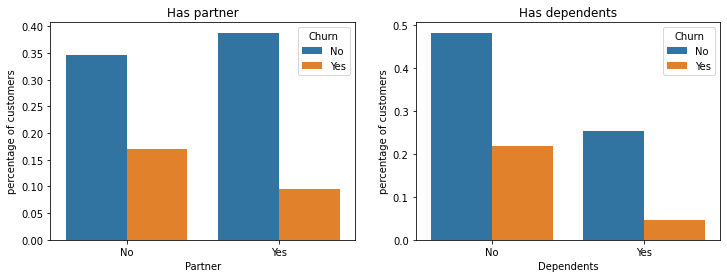

In [869]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

Pada barplot pertama di sebelah kanan menjelaskan custumer yang memiliki partner churn rate yes nye lebih rendah jika dibandingkan churn rate yes customer yang tidak memiliki partner. Pada Barplot kedua yang berada di sebelah kanan dapat terlihat customer yang churn rate yes nya tinggi adalah custumer yang has no dependency, hal ini masuk akal karena jika customer tersebut tidak memiliki ketergantungan dengan jasa komunikasi maka akan lebih baik untuk meniggalkanya.

In [870]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [871]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [872]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [875]:
telco = pd.get_dummies(df)

In [876]:
telco

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Explanatory Data Analysis Summary

Setelah dilakukan analisa pada fitur-fitur yang ada pada dataset Telco Churn dapat terlihat kecenderungan Churn yes terjadi pada kelompok citizens non senior hal ini masuk akal karena citizens yang tidak masuk kelompok senior biasanya lebih sering menghabiskan waktunya dengan menggunakan layanan internet. Pada fitur Monthly Charges dan Tenure terlihat bahwa kebanyakan costumer yang charges nya tinggi namun Tenure nya rendah hal ini menandakan kurangnya kepuasan mereka terhadap layanan yang diberikan dimana biasanya customer dengan charge tinggi adalah customer vip yang sudah seharusnya mendapat fasilitas first class untuk layanan telecomunikasi yang diberikan. Selanjutnya pada fitur Dependents dimana pada fitur ini menjelaskan mengenai independesi seseorang terhadap kebutuhan layanan komunikasi terlihat bahwa churn yes lebih banyak terjadi pada kelompok non dependent. Hal ini masuk akal namun seharusnya bisa di atasi dengan memberikan tawaran bundling seperti paket internet beserta perangkat alat komunikasi nya sehingga costumer non dependent tersebut dapat masuk ke dalam kelompok dependent. Pada fitur partner terlihat churn yes paling tinggi berada pada kelompok yang tidak memiliki partner. Melihat dari metode pembayaran yang paring sering dilakukan adalah metode pembayaran via elektronik check. Jenis layanan yang paling diminati adalah DSL (Digital Subscriber Line) sebesar 44 %. Dari sisi pembayaran kebanyakan customer melakukan pembayaran dengan kontrak monthly hal ini menandakan ada kemungkinan churn yes yang tinggi pada jenis kontak monthly.


### Splitting Dataset and Handling Imbalance Label

Pada bagian ini akan dilakukan handling imbalance variabel dependent. Kegunaan dari proses ini adalah agar nantinya algoritma deep learning tidak hanya mempelajari fitur target yang populasinya dominan pada dataset. Seperti yang sudah di informasikan sebelumnya pada bagian EDA Churn yes berada pada kisaran angka 2000 sedangan Churn no berada pada kisaran angka 5000 ke atas.

Setelah dilakukan analisis EDA di dapat fitur SeniorCitizen, tenure, monthly charges, gender, partner, dan dependents sebagai variabel independent yang di pilih untuk memprediksi churn yang pada penelitian ini dijadikan sebagai variabel dependent.

In [877]:
# dilakukan dropping unnamned 
telco = telco[['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Churn'
]]
telco

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Churn
0,0,1,29.85,1,0,0,1,1,0,0
1,0,34,56.95,0,1,1,0,1,0,0
2,0,2,53.85,0,1,1,0,1,0,1
3,0,45,42.30,0,1,1,0,1,0,0
4,0,2,70.70,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,1,0,1,0
7039,0,72,103.20,1,0,0,1,0,1,0
7040,0,11,29.60,1,0,0,1,0,1,0
7041,1,4,74.40,0,1,0,1,1,0,1


In [878]:
X = telco.drop(columns=['Churn'])
y = telco['Churn']

In [879]:
oversample = SMOTE()

Kode di atas digunakan untuk handling data imbalance

Dropping untuk variabel dependent

In [880]:
examples = telco.drop('Churn', axis=1)
target = telco['Churn']

Pada bagian ini splitting dilakukan ke dalam tiga kelompok, yaitu splitting untuk data train, test dan validation

In [881]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(examples,
                                                               target,
                                                               shuffle=True, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (4507, 9)
Validation data shape: (1127, 9)
Testing data shape: (1409, 9)


In [882]:
telco.columns.tolist()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Churn']

Kode di atas digunakan untuk melihat fitur apa saja yang ada pada dataset telco

In [883]:
x_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes'],
      dtype='object')

Kode di atas untuk memastikan bawha variabel target sudah dipisahkan dari dataset

In [884]:
num_features = x_train.columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

Kode di atas digunakan untuk mendefinisikan preprocessing yang terjadi di dalam pipeline

In [885]:
preproc_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ], verbose=True)

In [886]:
X_train = preproc_pipeline.fit_transform(x_train)
X_test = preproc_pipeline.transform(x_test)
X_val = preproc_pipeline.transform(x_val)

[ColumnTransformer] ....... (1 of 1) Processing numbers, total=   0.0s


Kode di atas digunakan untuk mentraformasikan bentuk dataframe ke dalam numpy array

In [887]:
X_train

array([[-0.44070811,  0.63011358,  0.48417413, ..., -0.95890874,
         0.64736435, -0.64736435],
       [-0.44070811,  1.0350127 , -1.44425811, ...,  1.04285211,
         0.64736435, -0.64736435],
       [-0.44070811, -1.23242235,  0.17907393, ..., -0.95890874,
         0.64736435, -0.64736435],
       ...,
       [-0.44070811, -1.07046271, -1.44923257, ..., -0.95890874,
         0.64736435, -0.64736435],
       [-0.44070811,  0.58962367,  0.86886568, ...,  1.04285211,
        -1.54472516,  1.54472516],
       [-0.44070811,  0.02276491, -1.32818738, ...,  1.04285211,
        -1.54472516,  1.54472516]])

Pada informasi di atas dapat terlihat X_train sudah berhasil di transformasikan ke dalam bentuk numpy array

In [888]:
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

Kode di atas digunakan untuk melakukan handling pada imbalance dataset

### Modelling

##### Sequential Model

Model Sequential pada deep learning adalah suatu model yang proses kerjanya terstruktur. Pada bagian ini dapat dilihat dense layer 11 yang sudah ada pada bagian pertama tidak akan di peroses lagi pada bagin ke tiga atau ke empat karena setiap dense yang di definisikan pada arsitektur neural network akan di jalankan secara berurutan

In [889]:
model_krs = Sequential()

In [890]:
Input_Shape = X_train.shape[1]

In [891]:
Input_Shape

9

In [892]:
model_krs.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu')) # Input layer
##Dropout for not memorize or overfitting the train data
model_krs.add(Dropout(0.2)) 

Pada architecture neural network ini digunakan Dropout di angka 0.2 yang berarti 20 persen neuron pada model tidak digunakan pada saat proses training. Tujuan dari Dropout ini adalah agar setiap neuron memiliki kapasitas yang tidak jauh berbeda dengan neuron lainya dalam hal melakukan training data.

In [893]:
model_krs.add(layers.Dense(1024, activation='relu')) # Hidden layer
model_krs.add(Dropout(0.2)) 

Dense disini berarti neuron pada layer sebelumnya terkoneksi pada layer disni. Pada kode di atas dense layer yang digunakan berjumlah 1024.

Activation function relu atau Rectified Liner digunakan karena activation function tersebut hanya memberikan output berdasarkan inputnya jika hasilnya positif dan akan memberikan output zero jika hasilnya negatif. ReLU digunakan  karena model ini mudah di terapkan untuk melakukan training pada model dan seringkali memberikan performa model yang bagus

In [894]:
model_krs.add(layers.Dense(1, activation='sigmoid')) # Output layer

Pada kode di atas activation function yang digunakan adalah sigmoid karena hasil yang ingin di dapat dari penelitian ini adalah binary classification. Untuk output layer yang di tetapkan adalah satu karena hasil yang di inginkan adalah binary classification

In [895]:
model_krs.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Kode di atas menjelaskan kompilasi model deep learning yang dipilih untuk loss adalah binary_crossentropy dengan optimizer adam dan metrics nya adalah accuracy. Binary crossentropy digunakan sebagai error valuation karena dalam penelitian ini yang dilakukan adalah klasifikasi variabel dependent sedangkan optimizer dengan jenis adam dipilih karena adam adalah optimizer yang sangat populer digunakan oleh banyak peneliti

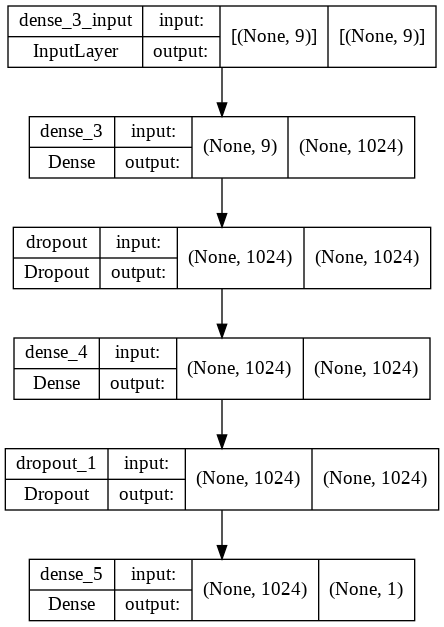

In [896]:
tf.keras.utils.plot_model(model_krs, show_shapes=True)

Kode di atas menjelaskan mengenai flow dari sequential deep neural network. Pada gambar di atas dapat terlihat setiap tahapan harus diproses secara berurutan dan tidak ada langkah yang di tiadakan

In [897]:
model_krs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              10240     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,060,865
Trainable params: 1,060,865
Non-trainable params: 0
_________________________________________________________________


Pada hasil summaru report untuk model sequential neural network di atas terlihat total params yang di gunakan berjumlah 1,060,865 dan trainable params nya adalah 1,060,865

In [898]:
fit_keras = model_krs.fit(X_train, y_train,
          epochs=100,
          verbose=True,
          validation_data=(X_test, y_test),
          batch_size=30)

Epoch 1/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4738 - accuracy: 0.7726 - val_loss: 0.4614 - val_accuracy: 0.7764
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 0.4604 - accuracy: 0.7788 - val_loss: 0.4555 - val_accuracy: 0.7842
Epoch 3/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4510 - accuracy: 0.7834 - val_loss: 0.4627 - val_accuracy: 0.7842
Epoch 4/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4499 - accuracy: 0.7828 - val_loss: 0.4572 - val_accuracy: 0.7821
Epoch 5/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4491 - accuracy: 0.7821 - val_loss: 0.4536 - val_accuracy: 0.7871
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4489 - accuracy: 0.7861 - val_loss: 0.4566 - val_accuracy: 0.7842
Epoch 7/100
151/151 [==============================] - 1s 3ms/step - loss: 0.4484 - accuracy: 0.7868 - val_loss: 0.4564 - val_accuracy: 0.7814

Pada kode di atas epoch yang di setting ada di angka 100, tidak ada ketentuan dalam menentukan nilai epoch karena epoch digunakan untuk melakukan monitoring pada data training di deep learning. Namun jika model deep learning mengalami masalah overfitting dapat dilakukan metode earlystopping sehingga pada tingkat akurasi yang telah di tetapkan pada epoch tertentu data tidak akan dilakukan training.

Berbicara mengenai penentuan nilai batch, tidak ada aturan baku yang mensyaratkan nilai batch di angka tertentu namun biasanya nilai batch disesuaikan dengan memori pada alat komputasi yang di jalankan. Batch sendiri berperan menampung data dari dataset yang di tampung ke dalam beberapa batch.

In [899]:
accuracy = model_krs.evaluate(X_train, y_train, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.4021
Training Accuracy: 0.8067


In [900]:
accuracy = model_krs.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.4721
Testing Accuracy: 0.7828


Pada hasil skor test dan akurasi di atas dapat terlihat model masih mengalami overfitting. 

### Model Valuation

Pada bagian ini akan dijelaskan mengenai hasil valuasi dari model sequential deep learning

In [901]:
def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Testing acc')
    plt.title('Training and Testing accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and Testing loss')
    plt.legend()

Kode di atas adalah function untuk menampilkan hasil valation model tensoflow yang sudah di train. 

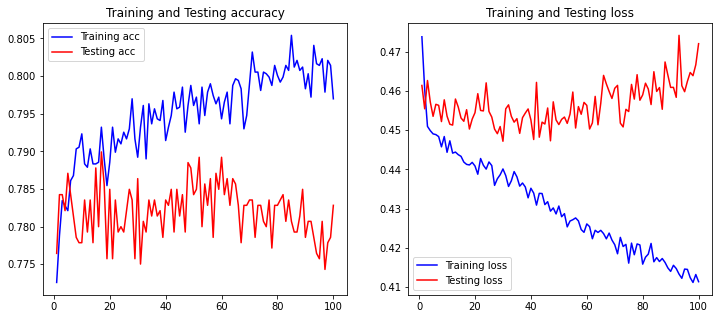

In [902]:
plot_history(fit_keras)

Pada gambar di atas interpretasi grafik akan dibagi menjadi dua skenario. Pertama jika ternyata grafiknya cenderung mengalami divergen maka interpretasi pertama yang digunakan. Namun jika grafik train dan testnya cenderung mengalami konvergen maka interpretasi kedua yang digunakan

Pada grafik di atas terlihat modelnya secara umum mengalami konvergen antara train dan test nya. Dimana hal menandakan model tidak mengalami overfitting dan gap antara train dan test mengalami konvergen pada bagian akhir grafik. Jika di analisa lebih jauh pergerakan grafik train dan test sangat tidak stabil atau bisa dikatakan modelnya mengalami exploding gradient. Pada gambar di begian kanan memperjelas model yang semakin konvergen. Namun karena ada masalah exploding gradient pada model selanjutnya akan dilakukan gradient clipping.

Pada grafik di atas dapat terlihat secara umum grafik train accuracy yang berwarna biru dan testing accuracy yang berwaran merah membentuk grafik yang saling konvergen dimana hal ini menandakan model tidak overfitting

In [903]:
fit_keras.params

{'epochs': 100, 'steps': 151, 'verbose': True}

Kode di atas menjelaskan params apa saja yang di gunakan pada model deep learning yang di bangun. Dapat terlihat epochs nya 100, step 151, verbose true. 

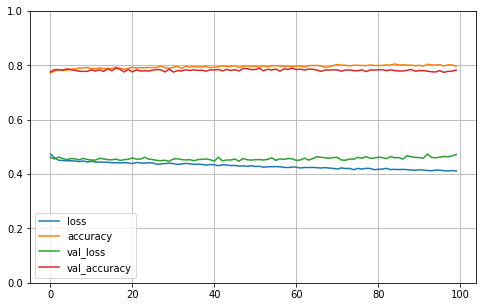

In [904]:
pd.DataFrame(fit_keras.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [905]:
model_krs.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7828


[0.472084105014801, 0.782824695110321]

Kode di atas menjelaskan akurasi dan loss pada model deep learning sequential. Dapat terlihat loss nya berada di angka 0.4805 dan akurasinya berada di angka 0.7835.

In [906]:
# Predicting the test set results
y_pred = model_krs.predict(X_test)
y_pred = (y_pred > 0.5)

In [907]:
sns.light_palette("seagreen", as_cmap=True)

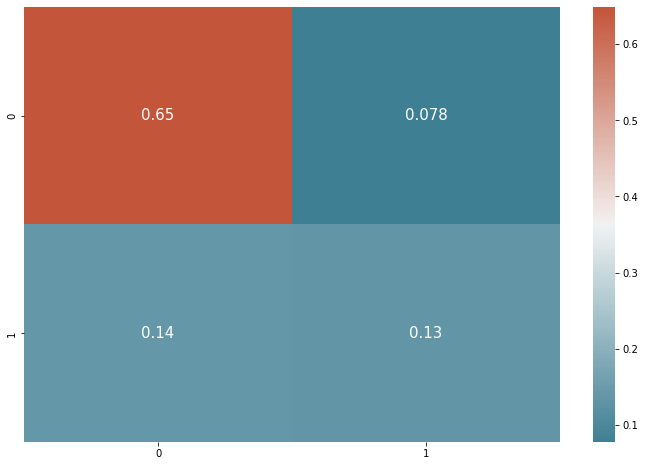

In [908]:
# confusion matrix
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap, annot = True, annot_kws = {'size':15})

In [909]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1024
           1       0.63      0.49      0.55       385

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Pada kasus ini model di bangun untuk memprediksi Churn yang terjadi pada perusahaan telekomunikasi. Metrics valuation yang paling relevan dalam konteks ini adalah precision. Salah satu cara untuk menghindari Churn yes adalah dengan melakukan metode marketing yang tepat agar custumer tetap loyal. Beberapa metode marketing yang dapat digunakan untuk mencegah customer pergi adalah dengan melakukan diskon dalam bentuk paket. Jika dilihat dari hasil explanatory data analysis kebanyakan churn yes terjadi pada kelompok usia yang relatif muda dan yang belum memiliki pasangan. Dengan melihat karekteristik data untuk fitur-fitur tersebut maka model marketing potongan harga dalam bentuk paket produk bisa digunakan dan tambahan produk entry level untuk paket internet saja tanpa harus berlangganan telepon juga bisa digunakan untuk menurunkan barrier to entry untuk customer baru. Kembali lagi mengenai metric valuation jika Churn pada kasus ini terprediksi yes padahal sebenarnya no maka cost dari kesalahan prediksi ini lebih besar dibandingkan jika model memprediksi churn no padahal aktual nya yes. Sederhananya pada saat Churn terprediksi yes padahal sebeneranya no perushaan sudah terlanjur mengeluarkan biaya marketing termasuk biaya iklan di dalamnya. Lain hal nya jika skenario yang terjadi adalah model memprediksi Churn nya adalah no padahal Churn sebenarnya adalah yes maka perusahaan hanya kehilangan opportuninity cost. Berdasarkan hasil classification report di atas terlihat di dapat angka precision sebesar 0.63.

### Model Improvement With Gradient Clipping

In [910]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [911]:
model_krs_clip = Sequential()

In [912]:
Input_Shape = X_train.shape[1]

In [913]:
Input_Shape

9

In [914]:
model_krs_clip.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu')) # Input layer
##Dropout for not memorize or overfitting the train data
model_krs_clip.add(Dropout(0.2)) 

In [915]:
model_krs_clip.add(layers.Dense(1024, activation='relu')) # Hidden layer
model_krs_clip.add(Dropout(0.2)) 

In [916]:
model_krs_clip.add(layers.Dense(1, activation='sigmoid')) # Output layer

In [917]:
model_krs_clip.compile(loss='binary_crossentropy', optimizer= keras.optimizers.SGD(clipvalue=1.0), metrics=['accuracy'])

In [918]:
fit_keras_clip = model_krs_clip.fit(X_train, y_train,
          epochs=100,
          verbose=True,
          validation_data=(X_test, y_test),
          batch_size=30)

Epoch 1/100
151/151 [==============================] - 1s 5ms/step - loss: 0.5753 - accuracy: 0.7320 - val_loss: 0.5384 - val_accuracy: 0.7268
Epoch 2/100
151/151 [==============================] - 1s 4ms/step - loss: 0.5201 - accuracy: 0.7366 - val_loss: 0.5106 - val_accuracy: 0.7268
Epoch 3/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4979 - accuracy: 0.7400 - val_loss: 0.4908 - val_accuracy: 0.7388
Epoch 4/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4808 - accuracy: 0.7562 - val_loss: 0.4767 - val_accuracy: 0.7665
Epoch 5/100
151/151 [==============================] - 1s 3ms/step - loss: 0.4695 - accuracy: 0.7730 - val_loss: 0.4669 - val_accuracy: 0.7757
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.7768 - val_loss: 0.4609 - val_accuracy: 0.7793
Epoch 7/100
151/151 [==============================] - 1s 3ms/step - loss: 0.4558 - accuracy: 0.7834 - val_loss: 0.4569 - val_accuracy: 0.7835

In [919]:
def plot_history(fit_keras_clip):
    acc = fit_keras_clip.history['accuracy']
    val_acc = fit_keras_clip.history['val_accuracy']
    loss = fit_keras_clip.history['loss']
    val_loss = fit_keras_clip.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Testing acc')
    plt.title('Training and Testing accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and Testing loss')
    plt.legend()

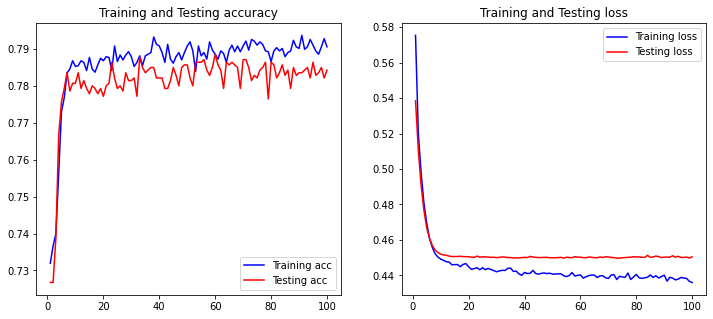

In [920]:
plot_history(fit_keras_clip)

Berdasarkan kedua gambar di atas dapat terlihat grafik berwarna biru di atas koreksi nya tidak setinggi sebelum dilakukan gradient clipping.

In [921]:
accuracy = model_krs_clip.evaluate(X_train, y_train, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.4348
Training Accuracy: 0.7937


In [922]:
accuracy = model_krs_clip.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.4505
Testing Accuracy: 0.7842


Berdasarkan gambar di atas dapat terlihat koreksi yang sebelum nya cukup fluktuatif atau bisa dikatakan model mengalami exploding gradient dapat di redam dengan menggunakan optimizer clipping gradient

In [923]:
model_krs_clip.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7842


[0.4505091905593872, 0.7842441201210022]

In [924]:
# Predicting the test set results
y_pred = model_krs_clip.predict(X_test)
y_pred = (y_pred > 0.5)

In [925]:
sns.light_palette("seagreen", as_cmap=True)

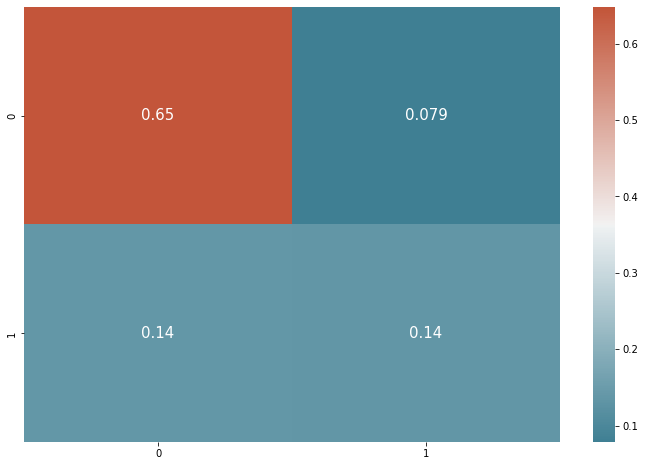

In [926]:
# confusion matrix
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap, annot = True, annot_kws = {'size':15})

In [927]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1024
           1       0.63      0.50      0.56       385

    accuracy                           0.78      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



Berdasarkan hasil classification report di atas dapat terlihat precision dan akurasinya masih di angka yang sama namun angka recall nya naik menjadi 0.50 dari sebelumnya yang berada di angka 49 sebelum dilakukan nya model improvement dengan gradient clipping. Tidak banya peningkatan perfroma model dengan melakukan gradient clipping namun performa model terlihat menjadi tidak terlalu fluktuatif dilihat dari runtime epochs nya.

### Model Improvement With Handling Imbalanced Dataset

In [928]:
X_train_balanced_clip, y_train_balanced_clip = oversample.fit_resample(X_train, y_train)

In [929]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [930]:
model_krs_clip_imp = Sequential()

In [931]:
Input_Shape = X_train_balanced_clip.shape[1]

In [932]:
Input_Shape

9

In [933]:
model_krs_clip_imp.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu')) # Input layer
##Dropout for not memorize or overfitting the train data
model_krs_clip_imp.add(Dropout(0.2)) 

In [934]:
model_krs_clip_imp.add(layers.Dense(1024, activation='relu')) # Hidden layer
model_krs_clip_imp.add(Dropout(0.2)) 

In [935]:
model_krs_clip_imp.add(layers.Dense(1, activation='sigmoid')) # Output layer

In [936]:
model_krs_clip_imp.compile(loss='binary_crossentropy', optimizer= keras.optimizers.SGD(clipvalue=1.0), metrics=['accuracy'])

In [937]:
fit_keras_clip_imp = model_krs_clip_imp.fit(X_train_balanced_clip, y_train_balanced_clip,
          epochs=100,
          verbose=True,
          validation_data=(X_test, y_test),
          batch_size=30)

Epoch 1/100
222/222 [==============================] - 1s 4ms/step - loss: 0.6458 - accuracy: 0.6575 - val_loss: 0.6078 - val_accuracy: 0.6728
Epoch 2/100
222/222 [==============================] - 1s 4ms/step - loss: 0.5846 - accuracy: 0.7127 - val_loss: 0.5632 - val_accuracy: 0.7090
Epoch 3/100
222/222 [==============================] - 1s 3ms/step - loss: 0.5494 - accuracy: 0.7315 - val_loss: 0.5480 - val_accuracy: 0.7225
Epoch 4/100
222/222 [==============================] - 1s 3ms/step - loss: 0.5316 - accuracy: 0.7402 - val_loss: 0.5379 - val_accuracy: 0.7275
Epoch 5/100
222/222 [==============================] - 1s 4ms/step - loss: 0.5222 - accuracy: 0.7399 - val_loss: 0.5396 - val_accuracy: 0.7232
Epoch 6/100
222/222 [==============================] - 1s 4ms/step - loss: 0.5187 - accuracy: 0.7408 - val_loss: 0.5223 - val_accuracy: 0.7388
Epoch 7/100
222/222 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.7372 - val_loss: 0.5263 - val_accuracy: 0.7324

In [938]:
def plot_history(fit_keras_clip_imp):
    acc = fit_keras_clip_imp.history['accuracy']
    val_acc = fit_keras_clip_imp.history['val_accuracy']
    loss = fit_keras_clip_imp.history['loss']
    val_loss = fit_keras_clip_imp.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Testing acc')
    plt.title('Training and Testing accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and Testing loss')
    plt.legend()

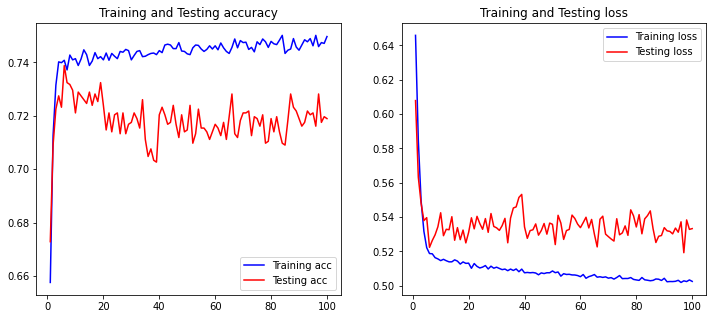

In [939]:
plot_history(fit_keras_clip_imp)

In [940]:
accuracy = model_krs_clip_imp.evaluate(X_train_balanced_clip, y_train_balanced_clip, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.4973
Training Accuracy: 0.7502


In [941]:
accuracy = model_krs_clip_imp.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.5333
Testing Accuracy: 0.7189


In [942]:
model_krs_clip_imp.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7189


[0.5332561135292053, 0.7189496159553528]

In [943]:
# Predicting the test set results
y_pred = model_krs_clip_imp.predict(X_test)
y_pred = (y_pred > 0.5)

In [944]:
sns.light_palette("seagreen", as_cmap=True)

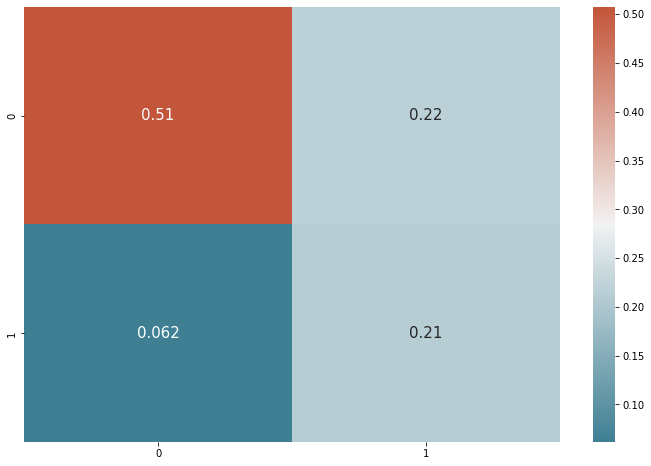

In [945]:
# confusion matrix
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap, annot = True, annot_kws = {'size':15})

In [946]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1024
           1       0.49      0.77      0.60       385

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.78      0.72      0.73      1409



Berdasakan hasil classification report di atas dapat terlihat nilai akurasi dan precision nya menurun jika dibandingkan dengan dua model deep learning sequential sebelumnya yang tidak dilakukan handling imbalance dataset. Metric valuation yang mengalami peningkatan adalah recall. Selama precsion adalah metric yang dijadikan fokus utama pada penelitian ini maka dapat dikatakna model ini masih kurang tepat sekalipun sudah di coba untuk dilakukan improvement

### Model Deployment

Pada bagian ini akan dilakukan freeze dari dense model yang akan dilakukan deployment. Freeze sendiri berguna agar params pada model deep learning tidak dapat berubah lagi.

In [947]:
# Freeze model
model_krs.trainable =  False

In [948]:
model_krs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              10240     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,060,865
Trainable params: 0
Non-trainable params: 1,060,865
_________________________________________________________________


In [949]:
model_krs.save("telco_model")

kode di atas digunakan untuk menyimpan model yang akan dilakukan deployment

In [950]:
! zip -r telco_model.zip telco_model

updating: telco_model/ (stored 0%)
updating: telco_model/keras_metadata.pb (deflated 88%)
updating: telco_model/assets/ (stored 0%)
updating: telco_model/saved_model.pb (deflated 89%)
updating: telco_model/variables/ (stored 0%)
updating: telco_model/variables/variables.data-00000-of-00001 (deflated 29%)
updating: telco_model/variables/variables.index (deflated 63%)


Model disimpan dalam bentuk zip dan selanjutnya siap untuk di download

### Using The Model To Make Prediction

Pada bagian ini model akan di uji dengan data baru untuk melakukan prediksi

In [951]:
X_new = X_test[:3]
y_proba = model_krs.predict(X_new)
y_proba.round(2)

array([[0.09],
       [0.1 ],
       [0.53]], dtype=float32)

In [952]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model_krs.predict(X_new), axis=-1)
y_pred

array([0, 0, 0])

In [953]:
# inference 
# siapkan data yang ingin di inference dalam bentuk list
X_test[:5].tolist()

[[-0.44070810680098216,
  1.6018714581851519,
  1.6979423121239952,
  1.0272173862408733,
  -1.027217386240873,
  -1.042852112249015,
  1.0428521122490153,
  0.647364352226785,
  -0.6473643522267851],
 [-0.44070810680098216,
  -0.5036039433756672,
  -1.4940027062242667,
  1.0272173862408733,
  -1.027217386240873,
  -1.042852112249015,
  1.0428521122490153,
  0.647364352226785,
  -0.6473643522267851],
 [-0.44070810680098216,
  -0.8275232359234854,
  0.6732035997399816,
  1.0272173862408733,
  -1.027217386240873,
  0.958908735240896,
  -0.9589087352408959,
  0.647364352226785,
  -0.6473643522267851],
 [-0.44070810680098216,
  -1.0704627053343492,
  -0.2984742084429178,
  -0.9735037718350196,
  0.9735037718350195,
  -1.042852112249015,
  1.0428521122490153,
  -1.54472515602725,
  1.5447251560272495],
 [-0.44070810680098216,
  -1.2324223516082584,
  -0.6400537792375888,
  1.0272173862408733,
  -1.027217386240873,
  -1.042852112249015,
  1.0428521122490153,
  0.647364352226785,
  -0.6473643

In [954]:
new_data = X_test[:5].tolist()

In [955]:
input_data_json = json.dumps({
    "signature_name":"serving_default",
    "instances":new_data
})

In [956]:
URL = "https://tfserving-beml1.herokuapp.com/v1/models/telco_model:predict"
r = requests.post(URL, data=input_data_json)
res = r.json()
res

{'predictions': [[0.0731372535],
  [0.0428684354],
  [0.548282206],
  [0.356230497],
  [0.400677383]]}

Setelah dilakukan deployment untuk model deep learning sequential maka model di uji untuk melakukan prediksi pada data baru.

## Modeling

### Functional Model

Berbeda dengan model sequential model deep learning functional adalah model yang stage nya tidak berurutan.

#### Input Pipeline

In [957]:
AUTOTUNE = tf.data.AUTOTUNE

In [958]:
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    #Building a pipeline from a data that exists in memory
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    
    #mapping the fuction we alredy made to the data
    preprocessed_data=data_ds
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
        
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
    
    
    return data_batches

In [1017]:
training_batches = get_batches(X_train_balanced, y_train_balanced, x_train.shape[0], 64, shuffle=True)
validation_batches = get_batches(X_val, y_val, x_val.shape[0], 64, shuffle=False)
testing_batches = get_batches(X_test, y_test, x_test.shape[0], 64, shuffle=False)

In [960]:
training_batches = training_batches.cache().prefetch(buffer_size=AUTOTUNE)
validation_batches = validation_batches.cache().prefetch(buffer_size=AUTOTUNE)

### Creating The Model

In [961]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Setiap kali model neural network dijalankan akan memakai banyak memori saat melakukan proses running dan saat prosses running selesai dilakukan. Seperti yang kita tahu jika space memory semakin sedikit maka suatu model akan berjalan lebih lambat olehkarenanya saya menggunakan clear seassion agar prosses running pada setiap model nya bisa dilakukan dengan cepat

In [962]:
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_acc')>0.69):
            print("\nReached 79% accuracy so canceling training!")
            self.model.stop_training = True

my_callbacks = stop_training()


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=5,
                                                  restore_best_weights=True)

In [963]:
def leaky_relu(x):
    return tf.maximum(0.01*x, x)

In [964]:
model_input = tf.keras.Input(shape=(9,))

x = tf.keras.layers.Dense(256,
                          kernel_regularizer=tf.keras.regularizers.L2(),
                          kernel_initializer='he_normal')(model_input)

x = tf.keras.layers.Lambda(leaky_relu)(x)

x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(128,
                          kernel_regularizer=tf.keras.regularizers.L2(),
                          kernel_initializer='he_normal')(x)

x = tf.keras.layers.Lambda(leaky_relu)(x)

x = tf.keras.layers.BatchNormalization()(x)

model_output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=model_input, outputs=model_output)

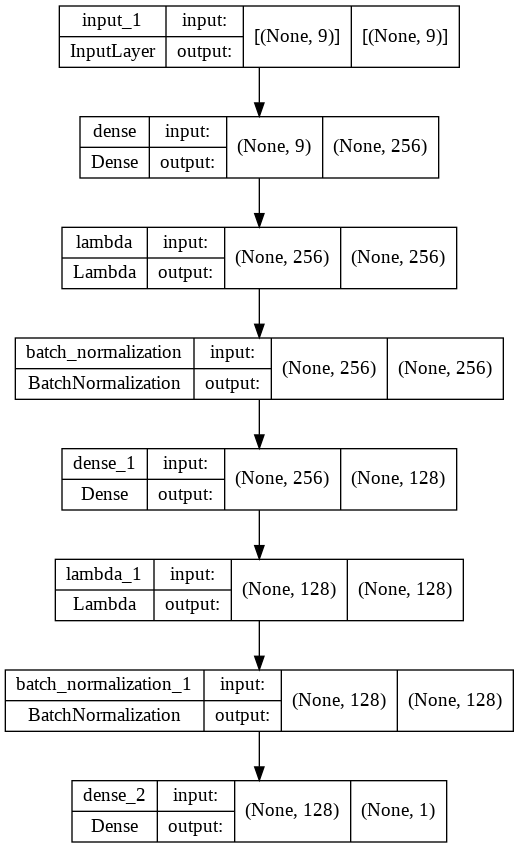

In [965]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [966]:
%%time
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(),
             metrics=['acc'])


CPU times: user 4 ms, sys: 4.07 ms, total: 8.07 ms
Wall time: 9.3 ms


In [967]:
np.random.seed(42)
tf.random.set_seed(42)

In [968]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [969]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           300         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 39)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

In [970]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['accuracy'])
history = model.fit(X_train_balanced, y_train_balanced, epochs=100,
                    validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 0.6756 - accuracy: 0.4741 - val_loss: 0.2827 - val_accuracy: 0.5963
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.5342 - val_loss: 0.2201 - val_accuracy: 0.6504
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.6146 - val_loss: 0.1992 - val_accuracy: 0.6921
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.1994 - accuracy: 0.6901 - val_loss: 0.1902 - val_accuracy: 0.7152
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.1890 - accuracy: 0.7247 - val_loss: 0.1885 - val_accuracy: 0.7196
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.1843 - accuracy: 0.7279 - val_loss: 0.1851 - val_accuracy: 0.7258
Epoch 7/100
208/208 [==============================] - 1s 3ms/step - loss: 0.1819 - accuracy: 0.7303 - val_loss: 0.1842 - val_accuracy: 0.7258

In [971]:
accuracy = model.evaluate(X_train_balanced, y_train_balanced, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.1707
Training Accuracy: 0.7414


In [972]:
accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.1832
Testing Accuracy: 0.7218


In [973]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.675601,0.474096,0.282693,0.596273
1,0.294779,0.534187,0.220077,0.650399
2,0.224227,0.614608,0.199170,0.692103
3,0.199408,0.690060,0.190213,0.715173
4,0.189012,0.724699,0.188518,0.719610
...,...,...,...,...
95,0.171008,0.742620,0.183146,0.716948
96,0.170990,0.742169,0.180546,0.722272
97,0.170960,0.741717,0.183005,0.713398
98,0.170961,0.741265,0.182394,0.716948


Kode di atas adalah rangkuman dari proses traning model deep learning functional

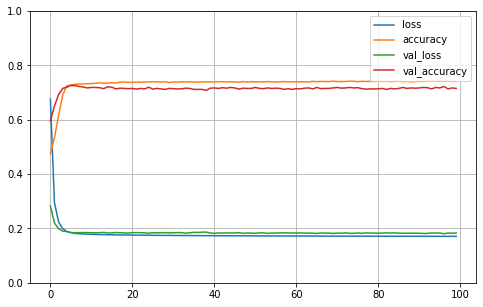

In [974]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

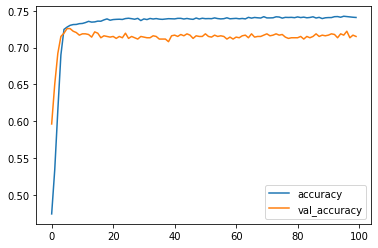

In [975]:
metrics[['accuracy', 'val_accuracy']].plot()

In [976]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

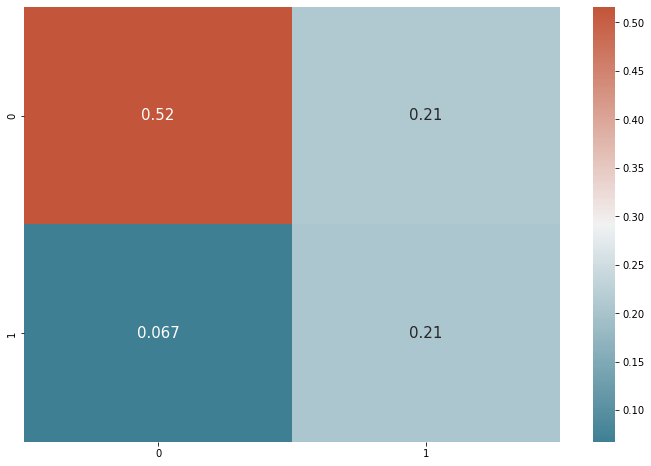

In [977]:
# confusion matrix
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap, annot = True, annot_kws = {'size':15})

In [978]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1024
           1       0.49      0.75      0.60       385

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



Berdasarkan hasil classification report di atas dapat terlihat model deep learning functional ini memiliki recall yang berada di angka 0.76 dan angka metric valuation ini lebih tinggi dari angka precision yang berada di angka 0.49 dan akurasi yang berada di angka 0.73.

### Functional Model Without Handling Imbalance Dataset

In [979]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.1599 - accuracy: 0.7590 - val_loss: 0.1557 - val_accuracy: 0.7657
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.7815 - val_loss: 0.1525 - val_accuracy: 0.7924
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.1483 - accuracy: 0.7874 - val_loss: 0.1516 - val_accuracy: 0.7941
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.7899 - val_loss: 0.1511 - val_accuracy: 0.7959
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1473 - accuracy: 0.7923 - val_loss: 0.1507 - val_accuracy: 0.7986
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.7932 - val_loss: 0.1506 - val_accuracy: 0.7995
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.7925 - val_loss: 0.1505 - val_accuracy: 0.8039

In [980]:
accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.1438
Training Accuracy: 0.7928


In [981]:
accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.1501
Testing Accuracy: 0.7807


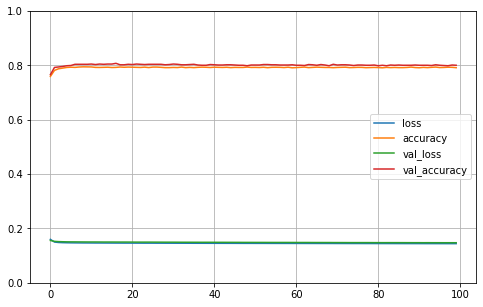

In [982]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [983]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

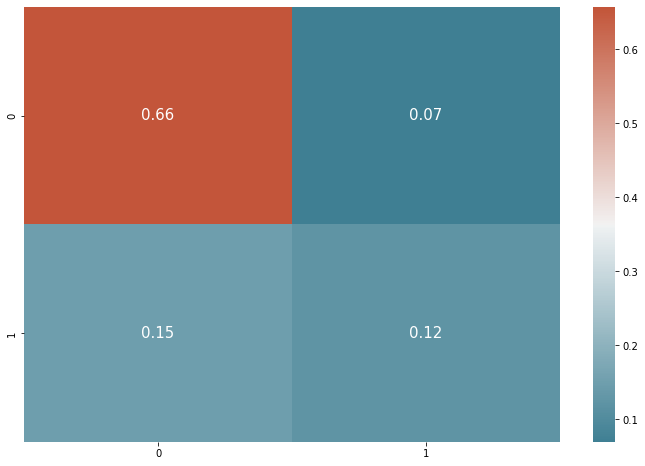

In [984]:
# confusion matrix
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap, annot = True, annot_kws = {'size':15})

In [985]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1024
           1       0.64      0.45      0.53       385

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



Berdasarkan hasil classification report di atas dapat terlihat nilai akurasi model deep learning functional di atas nilai akurasi nya lebih baik dibandingkan model deep learning functional yang dilakukan handling imbalanced dataset. 

### Model Deployement

Pada bagian ini akan dilakukan freeze dari dense model yang akan dilakukan deployment. Freeze sendiri berguna agar params pada model deep learning tidak dapat berubah lagi.

In [986]:
# Freeze model
model.trainable =  False

In [987]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           300         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 39)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

Pada model summary di atas dapat terlihat jika trainable params sudah 0 yang menandakan model sudah di freeze

In [988]:
model.save("telco_funct_model")

In [989]:
! zip -r telco_funct_model.zip telco_funct_model

updating: telco_funct_model/ (stored 0%)
updating: telco_funct_model/keras_metadata.pb (deflated 87%)
updating: telco_funct_model/assets/ (stored 0%)
updating: telco_funct_model/saved_model.pb (deflated 88%)
updating: telco_funct_model/variables/ (stored 0%)
updating: telco_funct_model/variables/variables.data-00000-of-00001 (deflated 38%)
updating: telco_funct_model/variables/variables.index (deflated 54%)


### Using The Model To Make Prediction

In [990]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.14],
       [0.25],
       [0.61]], dtype=float32)

In [991]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([0, 0, 0])

In [992]:
# inference 
# siapkan data yang ingin di inference dalam bentuk list
X_test[:5].tolist()

[[-0.44070810680098216,
  1.6018714581851519,
  1.6979423121239952,
  1.0272173862408733,
  -1.027217386240873,
  -1.042852112249015,
  1.0428521122490153,
  0.647364352226785,
  -0.6473643522267851],
 [-0.44070810680098216,
  -0.5036039433756672,
  -1.4940027062242667,
  1.0272173862408733,
  -1.027217386240873,
  -1.042852112249015,
  1.0428521122490153,
  0.647364352226785,
  -0.6473643522267851],
 [-0.44070810680098216,
  -0.8275232359234854,
  0.6732035997399816,
  1.0272173862408733,
  -1.027217386240873,
  0.958908735240896,
  -0.9589087352408959,
  0.647364352226785,
  -0.6473643522267851],
 [-0.44070810680098216,
  -1.0704627053343492,
  -0.2984742084429178,
  -0.9735037718350196,
  0.9735037718350195,
  -1.042852112249015,
  1.0428521122490153,
  -1.54472515602725,
  1.5447251560272495],
 [-0.44070810680098216,
  -1.2324223516082584,
  -0.6400537792375888,
  1.0272173862408733,
  -1.027217386240873,
  -1.042852112249015,
  1.0428521122490153,
  0.647364352226785,
  -0.6473643

In [993]:
new_data = X_test[:5].tolist()

In [994]:
input_data_json = json.dumps({
    "signature_name":"serving_default",
    "instances":new_data
})

In [995]:
URL = "https://tfserving-ml1-ftds013.herokuapp.com/v1/models/telco_model:predict"
r = requests.post(URL, data=input_data_json)
res = r.json()
res

{'predictions': [[0.374158025],
  [0.474052668],
  [0.839025557],
  [0.547429621],
  [0.689436078]]}

### Saving Model & Model Inference

Pada bagian ini akan dilakukan saving model untuk deployment menggunakan metoda h5 dan membuat model inference nya.

In [996]:
np.random.seed(42)
tf.random.set_seed(42)

In [997]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [998]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [999]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 0.6084 - val_loss: 0.3813
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.3177 - val_loss: 0.2510
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2336 - val_loss: 0.2031
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1973 - val_loss: 0.1812
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1792 - val_loss: 0.1700
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1693 - val_loss: 0.1638
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1636 - val_loss: 0.1603
Epoch 8/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1580
Epoch 9/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1581 - val_loss: 0.1566
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1569


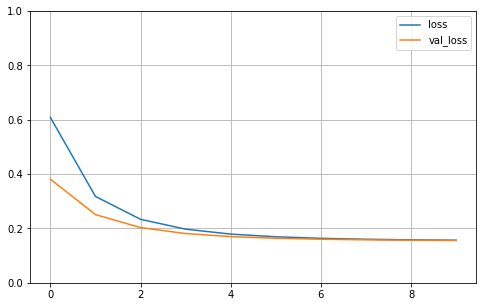

In [1000]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [1001]:
model.save("my_keras_model.h5")

In [1002]:
model = keras.models.load_model("my_keras_model.h5")

In [1003]:
model.predict(X_new)

array([[0.22415122],
       [0.35375887],
       [0.5580027 ]], dtype=float32)

### Extracting Feature Using Pipeline

Pada bagian ini akan dilakukan ekstraksi fitur fitur dengan menggunakan pipeline yaang hasil nya akan digunakan untuk front end deployment model deep learning 

In [1004]:
# dilakukan dropping
df = telco[['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Churn'
]]


In [1005]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [1006]:
df.columns.tolist()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Churn']

In [1007]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

Kode di bawah ini digunakan untuk melaukan proses preprocessing di dalam satu pipeline

In [1008]:
numeric_features = [
 'tenure',
 'MonthlyCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes']
numeric_features2 = ['SeniorCitizen']

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

numeric_transformer_sc = Pipeline([("scaler2", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_mms, numeric_features),
        ("num2", numeric_transformer_sc, numeric_features2), ])

In [1009]:
# ekstrak fitur menggunakan pipeline

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Kode di bawah ini digunakan untuk menyimpan hasil preprocessing pipeline yang selanjutnya akan dilakukan deployment.

In [1010]:
pickle.dump(preprocessor, open("telco_churn.pkl", "wb"))

Kode di bawah digunakan untuk mempermudah pembuatan front end deep learning deployment

In [1011]:
new_data = {'SeniorCitizen': 1,
         'tenure': 34,
         'MonthlyCharges' : 29.85,
         'gender_Female' : 1,
         'gender_Male' : 1,
         'Partner_No' : 0,
         'Partner_Yes': 0,
         'Dependents_No': 1,
         'Dependents_Yes': 1
         }

new_data = pd.DataFrame([new_data])
new_data

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,1,34,29.85,1,1,0,0,1,1


In [1012]:
new_data = preprocessor.transform(new_data)

In [1013]:
r.status_code

200

### Conclusion

Penelitian ini menggunakan dua jenis model deep learning yang berbeda yaitu model functional dan model sequential. Berbicara mengenai churn pada suatu perusahaan telekumnikasi maka cara paling mudah untuk melakukan konversi churn yes ke dalam kelompok loyal customer umumnya adalah dengan cara advertising seperti pemberian potongan harga yang di kemas dalam bentuk marketing. Disisi lain strategi tersebut memerlukan biya yang tidak sedikit sehingga kesalahan prediksi pada kasus churn ini jika terprediksi churn yes dan aktual nya adalah churn no maka cost yang muncul akibat kesalahan prediksi ini jauh lebih besar jika dibandingkan model memprediksi churn no padahal secara aktual churn nya yes konsekuensinya perusahaan hanya kehilangan opportunity cost

Handling imbalance dataset berguna untuk membuat algoritma untuk tidak hanya memfokuskan training pada kelompok data yang secara proporsi lebih besar. Namun dari beberapa model deep learning yang sudah dilakukan percoabaan model yang nilai precision nya paling tinggi adalah model yang tidak dilakukan handling imbalance dataset baik itu model deep learning sequential ataupun model deep learning functional. Model improvement seperti gradient clipping memang beerhasil meminimalisir gradient exploding pada runtime epochs nya namun masih belum berhasil meningkatkan performa model secara signifikan. Jika dikaitkan dengan teknik handling imbalance dataset perlu dilakukan agar model tidak hanya berfokus pada traning dataset yang secara proporsi paling tinggi sehingga model tetap mampu memprediksi dengan kemampuan yang sama untuk proporsi dataset yang lebih rendah. Namun pada saat proses pemilihan model dengan metric valuation yang tepat ternyata bertentangan dengan proses handling unbalance dataset pada algoritma deep learning yang digunakan karena pada penelitian ini metric valuation yang menjadi fokus utama yaitu precison dengan nilai tertinggi berada pada model yang tidak dilakukan handling unbalance dataset.